In [23]:
#California Dataset


In [69]:
import pandas as pd
data = pd.read_csv("CaliforniaHousing/cal_housing.data")
data.columns = ['latitute',"longitude","housingMedianAge","totalRooms","totalBedrooms","population","households","medianIncome","medianHouseValue"]
target = data.medianHouseValue
data_features = data.drop("medianHouseValue", 1)
data.columns

Index([u'latitute', u'longitude', u'housingMedianAge', u'totalRooms',
       u'totalBedrooms', u'population', u'households', u'medianIncome',
       u'medianHouseValue'],
      dtype='object')

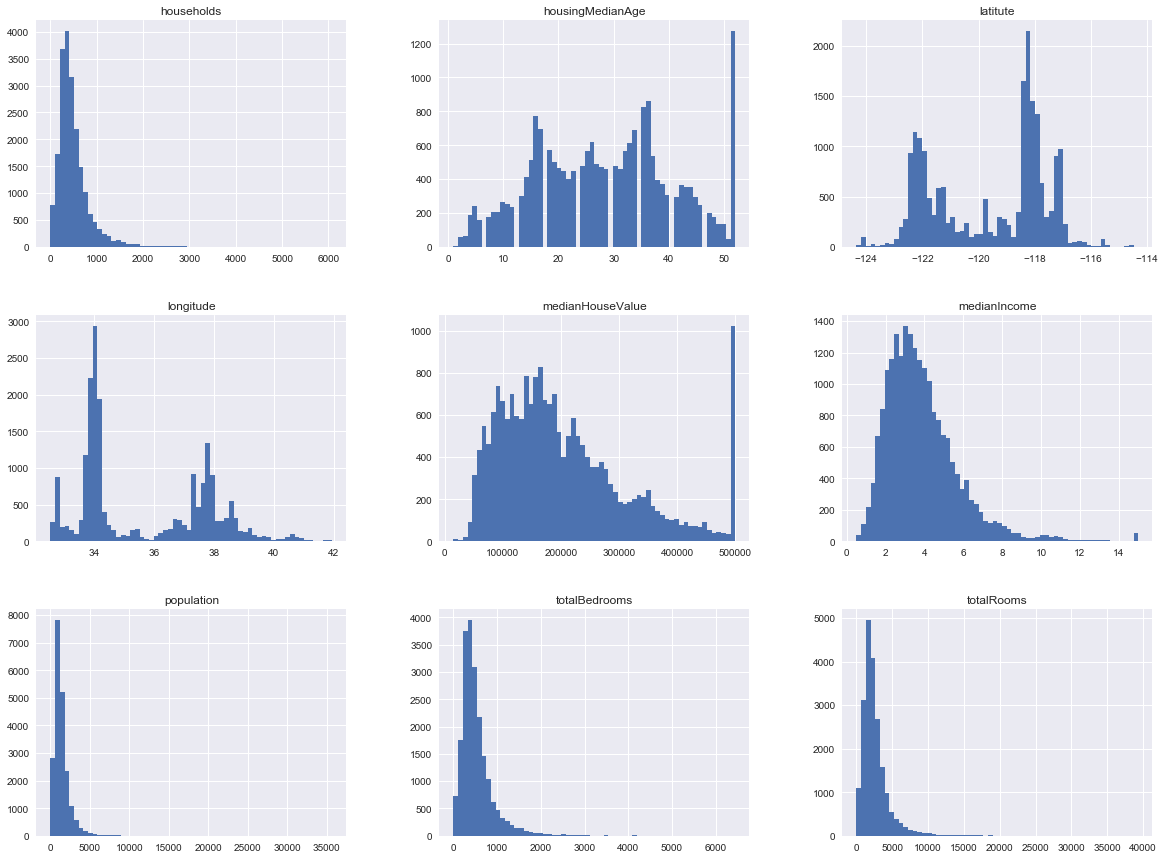

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=60, figsize=(20,15))
plt.show()

/Users/avaneeshkumar/.virtualenvs/cv/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


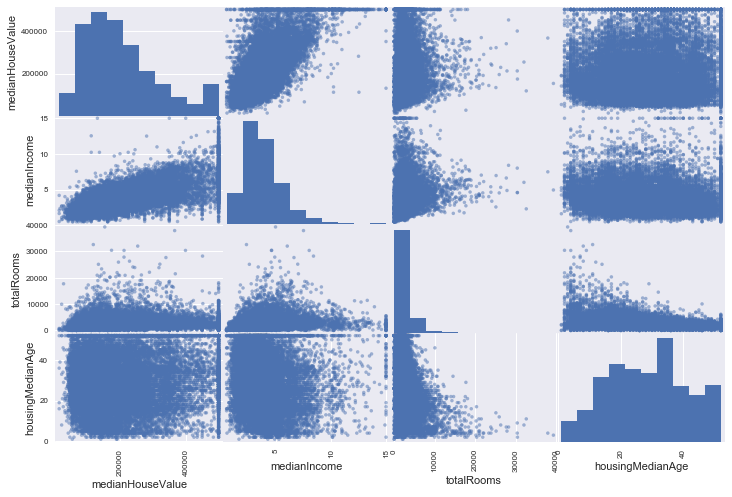

In [28]:
from pandas.tools.plotting import scatter_matrix

attributes = ["medianHouseValue", "medianIncome", "totalRooms",
              "housingMedianAge"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

In [24]:
data_features.head()

,latitute,longitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368


In [30]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data_features,target,test_size=0.2, random_state = 10)

16511
4128


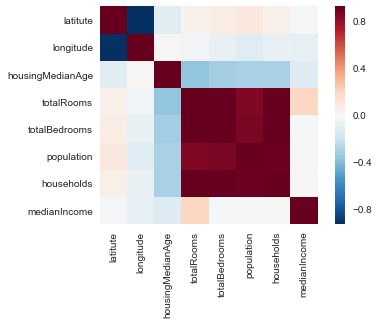

In [31]:
import seaborn as sns
corr_matrix = data_features.corr()
sns.heatmap(corr_matrix, vmax=.8, square=True)
print len(X_train)
print len(X_test)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
#clf_A = LogisticRegression(random_state = 10)
clf = GradientBoostingRegressor(random_state = 10)
clf.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=1.0, verbose=0,
             warm_start=False)

In [32]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(clf,X_train,y_train, cv=10)

In [33]:
scores2

array([ 0.7793099 ,  0.78280477,  0.77252648,  0.76073466,  0.77908467,
        0.75200081,  0.78124461,  0.78254152,  0.76241172,  0.75814547])

In [34]:
y_pred = clf.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))

In [61]:
#due to excessive difference in scale of values. 
mse


2946521466.5089402

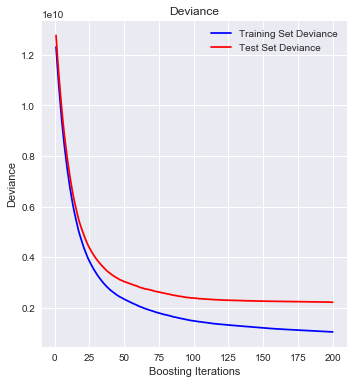

In [44]:
params = {'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 5,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)
clf.fit(X_train,y_train)

import numpy as np
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

[  86.40102413   84.82235277   31.04096321   43.79673799   31.14508883
   51.20169649   31.33021498  100.        ]


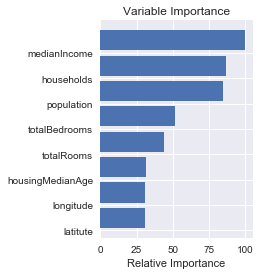

In [77]:
feature_names = data_features.columns
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print feature_importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(range(data_features.shape[1]), feature_names)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [64]:
feature_names = data.columns
print feature_names

Index([u'latitute', u'longitude', u'housingMedianAge', u'totalRooms',
       u'totalBedrooms', u'population', u'households', u'medianIncome',
       u'medianHouseValue'],
      dtype='object')
